In [1]:
import numpy as np
import matplotlib.pyplot as plt
import HePy as he
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator

Build an $|n\ell m_{\ell}\rangle$ basis. Input array of $n$ values and array of $m_{\ell}$ values you wish to consider.

In [2]:
nmin, nmax = 31, 33
ns = np.arange(nmin,nmax+1,1)
mls = [0]
basis = he.Basis(ns,mls)

Index basis array as [state][quantum number] i.e [0][0] is the value of $n$ for the first state, [5][1] is the value of $\ell$ for the fifth state etc.

Calculate $\hat{H}_0$ which is a diagonal square matrix of field free energies:
<br><br>
$W = -\frac{R_{He}c}{(n-\delta)^2}$

In [3]:
# Calculate Quantum defects for each state in basis.
QD_arr = he.QD_Array(basis,S=0)

# Calculate field free transition energies.
H0 = he.H_0(basis,QD_arr)

Calculate $\hat{H}_{Stark}$ - the off diagonal field pertubations to the field free energies. Calculate for 1 V/m (the default value of $F_z$) as a base, then multiply by the field values later. **This calculation is slow**, so best to only do it once if possible.

In [4]:
Hs = he.H_s(basis,QD_arr,step=0.0065)

100%|██████████████████████████████████████████████████████████████████████████████████| 96/96 [00:30<00:00,  3.13it/s]


Now you've got both parts of the total hamiltonian, add them together, multiply by the field values, diagonalise the total matrix and sort the eigenvlaues. 

In [5]:
Fz_arr = np.arange(0,5000,2) # V/m
Eigvals, Eigvecs = he.E_Stark(H0,Hs,Fz_arr)

100%|█████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:05<00:00, 456.38it/s]


Index the eigenvalues as [state, field] - for example: locate the `33s` state. (This lies below the 32 manifold in the singlet states)!

In [6]:
idx = he.lookup_eigval(basis,32,0) # (basis,n,i)
idx1 = he.lookup_eigval(basis,32,31) # (basis,n,i)

Reproduce plot from Hogan, S. 2012 (DOI: 10.1103/PhysRevLett.108.063004)

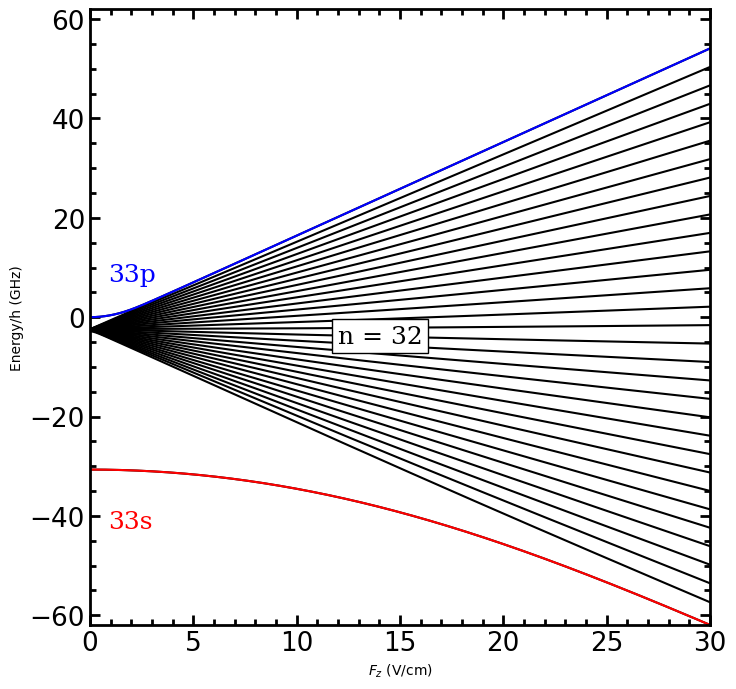

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 
fsize = 21
lnwidth = 1
tickwidth = 1
msize = 1
mpl.rc('font',family='serif')
mpl.rc('font',size=18)

# Plot the energies for all states in all fields
offset = Eigvals[idx1,0]*1e-9

for i in range(len(Eigvals)):
    plt.plot(Fz_arr*1e-2,Eigvals[i,:]*1e-9 - offset,ls='-',marker='',c='k')
    
# Highlight the 32s state using index located above
plt.plot(Fz_arr*0.01,Eigvals[idx,:]*1e-9 - offset,ls='-',marker='',c='red',label='33s')
plt.plot(Fz_arr*0.01,Eigvals[idx1,:]*1e-9 - offset,ls='-',marker='',c='blue',label='33p')


plt.xlabel(r'$F_z$ (V/cm)')
plt.ylabel('Energy/h (GHz)')
# plt.legend(loc='best',frameon=False);

plt.xlim(0,30)
# plt.ylim(-3275,-3150)
plt.ylim(-62,62)

# Aesthetics
ax.spines['right'].set_linewidth(lnwidth*2)
ax.spines['top'].set_linewidth(lnwidth*2)
ax.spines['left'].set_linewidth(lnwidth*2)
ax.spines['bottom'].set_linewidth(lnwidth*2)
ax.tick_params(axis='both', which='major', labelsize=fsize*0.9, width = tickwidth*2, length = 7,
                direction='in', bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='both', which='minor',width = tickwidth*2, length = 4,
                direction='in', bottom=True, top=True, left=True, right=True)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

## TICKS
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(MultipleLocator(5))

ax.annotate('n = 32',xy=((0.4), 0.45), xycoords='axes fraction',horizontalalignment='left', 
                verticalalignment='bottom', color ='k',fontsize=20*0.9,bbox=dict(facecolor='w',edgecolor='k'))
ax.annotate('33p',xy=((0.03), 0.55), xycoords='axes fraction',horizontalalignment='left', 
                verticalalignment='bottom', color ='b',fontsize=20*0.9,bbox=dict(facecolor='w',edgecolor='w'))
ax.annotate('33s',xy=((0.03), 0.15), xycoords='axes fraction',horizontalalignment='left', 
                verticalalignment='bottom', color ='r',fontsize=20*0.9,bbox=dict(facecolor='w',edgecolor='w'))

# plt.savefig('n32_singlets.png',bbox_inches='tight',facecolor='w',dpi=300)